In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [12,8]

## Task 1

In [2]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, None)
noise = tf.placeholder(tf.float32, None)

with tf.name_scope("regression") as scope:
    h = -6.7*x + 2 + noise

sess = tf.Session()
for i in xrange(100):
    x_hat, noise_hat= np.random.uniform(-10,10), np.random.uniform(-1,1)
    result = sess.run(h, feed_dict={x:x_hat, noise:noise_hat})
    print(x_hat, result)
writer = tf.summary.FileWriter("lab4_comp_graphs", sess.graph)
writer.close()

(-4.032807694198546, 28.186344)
(-8.184742073410632, 56.768791)
(-7.0229489224270925, 48.627258)
(4.034842999818046, -24.376493)
(-7.810989542642899, 54.06649)
(-1.6117217078073658, 12.534411)
(-8.601124510685832, 59.235458)
(-7.936450629097025, 56.007072)
(-4.184144885204799, 29.759617)
(3.9771437937352268, -24.574287)
(-9.420243366302966, 64.658073)
(-3.761803644590918, 26.974718)
(0.42998340742231456, -0.21970588)
(-7.064070437531617, 48.564487)
(7.203887447503934, -47.119003)
(3.8783969101159173, -24.484186)
(3.333941985658111, -21.173563)
(-0.7211820195383538, 7.7752562)
(-4.14438278342417, 29.779657)
(-0.536179814468591, 5.779819)
(8.190846260893565, -52.803806)
(-1.008252826843668, 8.597312)
(-6.937854021062391, 49.262947)
(-9.145335548894886, 62.650784)
(9.142760581383854, -59.874931)
(-1.736078557923177, 14.249733)
(5.1770953172925775, -33.248482)
(-5.124492249396484, 35.384338)
(-6.903347786944862, 47.615238)
(-0.695175630449711, 6.7057872)
(1.3279368500273492, -6.014575)
(-7

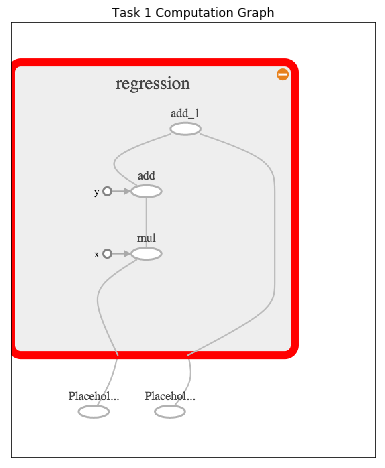

In [2]:
img = plt.imread("tasks/lab4_task1.png")
plt.imshow(img)
plt.title("Task 1 Computation Graph")
plt.xticks([])
plt.yticks([])
plt.show()

## Task 2

In [6]:
tf.reset_default_graph()
x_hat = tf.placeholder(tf.float32, None)
target = tf.placeholder(tf.float32, None)
b = tf.Variable([.1], name='b')
m = tf.Variable([.1], name="m")

with tf.name_scope("estimator") as scope:
    with tf.name_scope("delta") as scope:
        net = m*x_hat + b
        delta = .005*(target - net)
    new_b = delta + b
    new_m = delta*x_hat + m
    b = tf.assign(b, new_b)
    m = tf.assign(m, new_m)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in xrange(1000):
    x, noise = np.random.uniform(-10,10), np.random.uniform(-1,1)
    y_true = -6.7*x + 2 + noise
    b_ans, m_ans = sess.run([b,m], feed_dict={x_hat:x, target:y_true})
    # print b_ans, m_ans
print "I guess the line is: {}*x + {}".format(m_ans[0], b_ans[0])
writer = tf.summary.FileWriter("lab4_comp_graphs", sess.graph)
writer.close()

I guess the line is: -6.70187044144*x + 2.04689717293


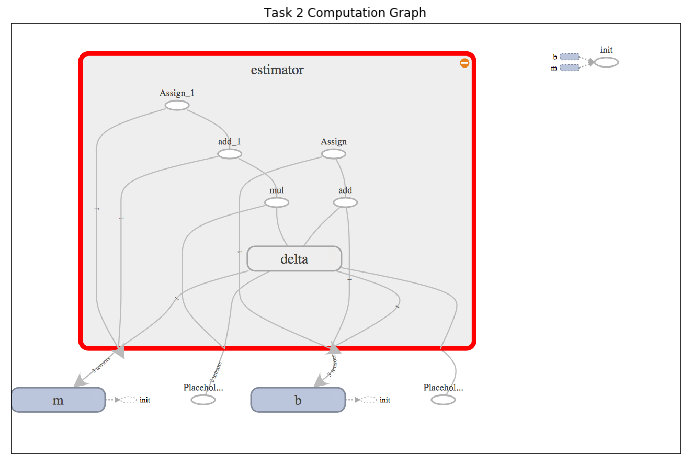

In [3]:
img = plt.imread("tasks/lab4_task2.png")
plt.imshow(img)
plt.title("Task 2 Computation Graph")
plt.xticks([])
plt.yticks([])
plt.show()

## Task 3

In [8]:
tf.reset_default_graph()
x_hat = tf.placeholder(tf.float32, [None, 3])
target = tf.placeholder(tf.float32, None)
beta = tf.get_variable("beta", [1, 3], dtype=tf.float32, initializer=tf.zeros_initializer)

with tf.name_scope("estimator") as scope:
    with tf.name_scope("delta") as scope:
        net = tf.reduce_sum(tf.multiply(beta, x_hat))
        delta = .005*(target - net)*x_hat
    new_beta = tf.add(delta, beta)
    beta = tf.assign(beta, new_beta)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in xrange(1000):
    x, noise = np.random.uniform(-10,10, size=(2,1)), np.random.uniform(-1,1)
    beta_true = np.array([-2.3, 4.5, 9.4]).reshape(3,1)
    x = np.append(x, [1])
    x = x.reshape(1,3)
    y_true = np.dot(x, beta_true) + noise
    beta_ans = sess.run(beta, feed_dict={x_hat:x, target:y_true})
writer = tf.summary.FileWriter("lab4_comp_graphs", sess.graph)
writer.close()
print "I guess beta is: {}".format(beta_ans)

I guess beta is: [[-2.33735752  4.41147995  9.31149197]]


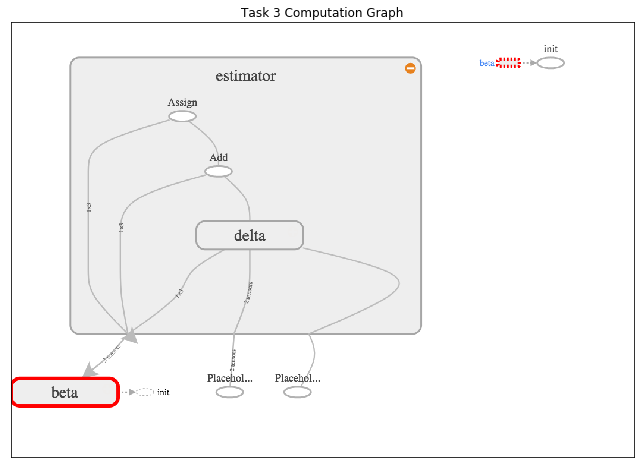

In [4]:
img = plt.imread("tasks/lab4_task3.png")
plt.imshow(img)
plt.title("Task 3 Computation Graph")
plt.xticks([])
plt.yticks([])
plt.show()

## Task 4

In [10]:
foo_df = pd.read_csv("foo.csv")
foo_matrix = foo_df.as_matrix()

In [11]:
tf.reset_default_graph()
x_hat = tf.placeholder(tf.float32, [None, 3])
target = tf.placeholder(tf.float32, None)
beta = tf.get_variable("beta", [1, 3], dtype=tf.float32, initializer=tf.zeros_initializer)

with tf.name_scope("estimator") as scope:
    with tf.name_scope("delta") as scope:
        net = tf.reduce_sum(tf.multiply(beta, x_hat))
        delta = .005*(target - net)*x_hat
    new_beta = tf.add(delta, beta)
    beta = beta.assign(beta + delta)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in xrange(len(foo_matrix)):
    x, y = foo_matrix[i][:2], foo_matrix[i][2]
    noise = np.random.uniform(-1,1)
    beta_true = np.zeros((3,1))
    x = np.append(x, [1])
    x = x.reshape(1,3)
    beta_ans = sess.run(beta, feed_dict={x_hat:x, target:y})
writer = tf.summary.FileWriter("lab4_comp_graphs", sess.graph)
writer.close()
print "I guess beta is: {}".format(beta_ans)

I guess beta is: [[-7.79050541  2.69579983  0.83829123]]


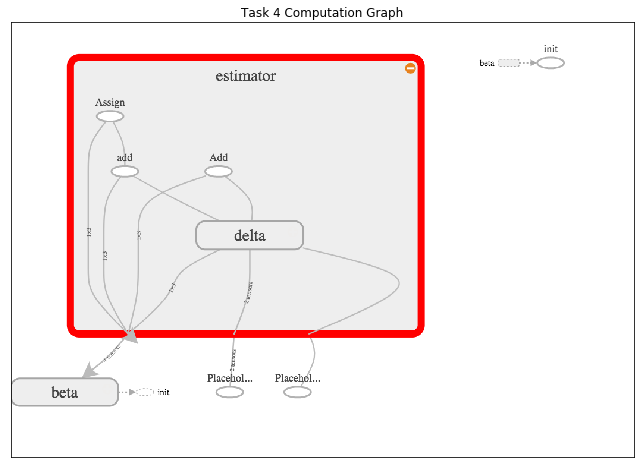

In [5]:
img = plt.imread("tasks/lab4_task4.png")
plt.imshow(img)
plt.title("Task 4 Computation Graph")
plt.xticks([])
plt.yticks([])
plt.show()